<a href="https://colab.research.google.com/github/sureshcrwr/Mini-Projects/blob/main/Regression-%20synchronous_machine_dataset_99_97_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
df=pd.read_csv("/content/drive/MyDrive/SynchronousMachine.csv")

In [12]:
df.head()

,I_y,PF,e_PF,d_if,I_f
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [15]:
new_col_names={'I_y': 'Load_Current','PF': 'Powerfactor','e_PF': 'Power_factor_error','d_if': 'Change_of_excitation_current','I_f': 'Excitation_ current'}

In [14]:
df.columns=df.columns.map(new_col_names)

In [16]:
df.head()

,Load_Current,Powerfactor,Power_factor_error,Change_of_excitation_current,Excitation_ current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Load_Current                  557 non-null    float64
 1   Powerfactor                   557 non-null    float64
 2   Power_factor_error            557 non-null    float64
 3   Change_of_excitation_current  557 non-null    float64
 4   Excitation_ current           557 non-null    float64
dtypes: float64(5)
memory usage: 21.9 KB


In [18]:
df.corr()['Excitation_ current']

Load_Current                    0.424945
Powerfactor                    -0.861013
Power_factor_error              0.861013
Change_of_excitation_current    1.000000
Excitation_ current             1.000000
Name: Excitation_ current, dtype: float64

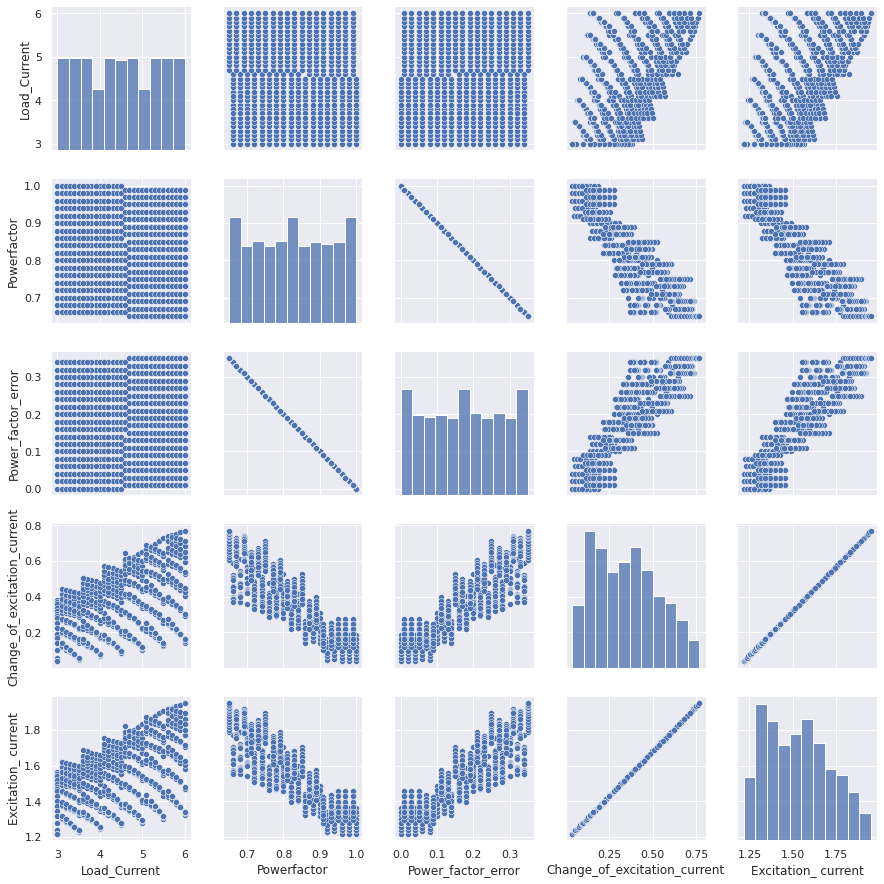

In [19]:
sns.pairplot(df)

In [ ]:
#Lets check outliers

In [20]:
def outlier(cols):
    
    for col in cols:
        print("Details of outliers for column: ",col)
        print('\n')
        
        q75,q25=np.percentile(df[col],[75,25])
    
        print("25th Percentile is: ",q25)
        print("75th Percentile is: ",q75)

        iqr=np.round(q75-q25,3)
        print("Inter Quartile range is: ",iqr)

        upperlim=np.round(q75+(1.5*iqr),3)
        print("Upper limit is: ", upperlim)

        lowerlim=np.round(q25-(1.5*iqr),3)
        print("Lower limit is: ", lowerlim)
        
        
        print('\n')
        print("Rows above Upper Limit are: ",len(df[df[col]>upperlim]))
        print("Rows below Lower Limit are: ",len(df[df[col]<lowerlim]))
        
        print('\n')
        print('-------------')
        print('\n')


In [21]:
cols=df.columns

In [22]:
outlier(cols)

Details of outliers for column:  Load_Current


25th Percentile is:  3.7
75th Percentile is:  5.3
Inter Quartile range is:  1.6
Upper limit is:  7.7
Lower limit is:  1.3


Rows above Upper Limit are:  0
Rows below Lower Limit are:  0


-------------


Details of outliers for column:  Powerfactor


25th Percentile is:  0.74
75th Percentile is:  0.92
Inter Quartile range is:  0.18
Upper limit is:  1.19
Lower limit is:  0.47


Rows above Upper Limit are:  0
Rows below Lower Limit are:  0


-------------


Details of outliers for column:  Power_factor_error


25th Percentile is:  0.08
75th Percentile is:  0.26
Inter Quartile range is:  0.18
Upper limit is:  0.53
Lower limit is:  -0.19


Rows above Upper Limit are:  0
Rows below Lower Limit are:  0


-------------


Details of outliers for column:  Change_of_excitation_current


25th Percentile is:  0.189
75th Percentile is:  0.486
Inter Quartile range is:  0.297
Upper limit is:  0.932
Lower limit is:  -0.256


Rows above Upper Limit are:  

---------

#### Linear Regression Model

In [23]:
X=df.drop('Excitation_ current',axis=1)

In [24]:
y=df['Excitation_ current']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler= StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train=scaler.transform(X_train)

In [31]:
X_test=scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predicted_y=model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))
MAE=mean_absolute_error(y_test,predicted_y)

In [38]:
RMSE

1.6431586533659613e-16

In [39]:
MAE

1.163090787702545e-16

In [40]:
model.score(X_test,y_test)

1.0

In [41]:
print("Test Accuracy of Linear Regression model is:",round(100*model.score(X_test, y_test),2))

Test Accuracy of Linear Regression model is: 100.0


In [42]:
print("Train Accuracy of Linear Regression model is:",round(100*model.score(X_train, y_train),2))

Train Accuracy of Linear Regression model is: 100.0


In [43]:
print('Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,predicted_y)))

Mean Squared Error is:  1.6431586533659613e-16


---------

####  Elastic Net Model

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
elastic_net_model=ElasticNet(max_iter=1000000,tol=0.01)

In [46]:
#lets seach for best parameters using 'GridSearchCV'

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#defining various alphas and l1 ratios to check the best parameter
param_grid={'alpha':[0.001,0.1,1,5,7,10,50,75,100,150,200],'l1_ratio':[0.001,0.1,0.2,0.5,0.7,0.99,1]}

In [49]:
grid_model=GridSearchCV(estimator=elastic_net_model,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)

In [50]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000, tol=0.01),
             param_grid={'alpha': [0.001, 0.1, 1, 5, 7, 10, 50, 75, 100, 150,
                                   200],
                         'l1_ratio': [0.001, 0.1, 0.2, 0.5, 0.7, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [51]:
grid_model.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=1, max_iter=1000000, tol=0.01)

In [52]:
predicted_y=grid_model.predict(X_test)

In [53]:
MAE=mean_absolute_error(y_test,predicted_y)
RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))

In [54]:
MAE

0.0023603719266736887

In [55]:
RMSE

0.0029825347813075913

In [56]:
final_elastic_model= ElasticNet(alpha=0.001,l1_ratio=1,max_iter=1000000,tol=0.01)

In [57]:
final_elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=1, max_iter=1000000, tol=0.01)

In [58]:
predicted_y=final_elastic_model.predict(X_test)

In [59]:
print('Test Accuracy of ElasticNet Model: ',round(100*final_elastic_model.score(X_test, y_test),2),'%')

Test Accuracy of ElasticNet Model:  99.97 %


In [60]:
print('Train Accuracy of ElasticNet Model: ',round(100*final_elastic_model.score(X_train, y_train),2),'%')

Train Accuracy of ElasticNet Model:  99.97 %
